# House prices Competition solutions


## 1.&nbsp;Loading data
We begin by loading the "House prices" dataset and preparing it for model training.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.compose import ColumnTransformer
set_config(transform_output='pandas')
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Data Loading
# -----------------------------
from google.colab import files
import pandas as pd

uploaded = files.upload()

df_train = pd.read_csv("train.csv").set_index("Id")
df_test = pd.read_csv("test.csv").set_index("Id")

Saving test.csv to test.csv
Saving train.csv to train.csv


## 2.&nbsp;Exploring data

In [2]:
df_train.info()
df_train.describe()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [3]:
df_test.info()
df_test.describe()
df_test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
Street,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


###Check for class imbalance and outliers

Class distribution (counts):
SalePrice
140000    20
135000    17
145000    14
155000    14
190000    13
          ..
223000     1
257000     1
282922     1
193879     1
137450     1
Name: count, Length: 663, dtype: int64 

Class distribution (%):
SalePrice
140000    1.37
135000    1.16
145000    0.96
155000    0.96
190000    0.89
          ... 
223000    0.07
257000    0.07
282922    0.07
193879    0.07
137450    0.07
Name: proportion, Length: 663, dtype: float64 

Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice

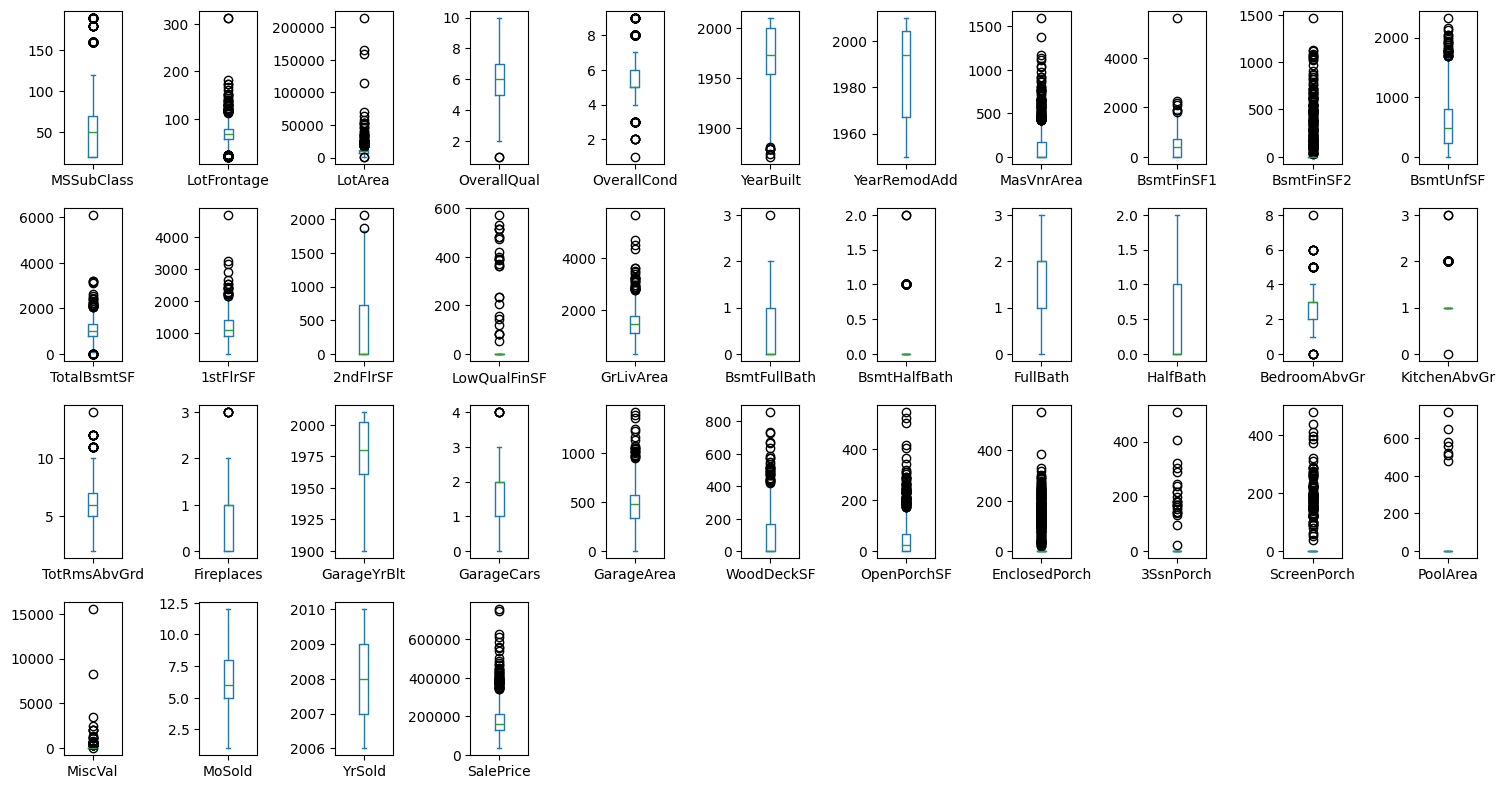

In [4]:
# Check class distribution
print("Class distribution (counts):")
print(df_train["SalePrice"].value_counts(), "\n")

print("Class distribution (%):")
print((df_train["SalePrice"].value_counts(normalize=True) * 100).round(2), "\n")

# Identify numerical columns
numerical_columns = df_train.select_dtypes(include='number').columns.tolist()
print(f"Numerical columns: {numerical_columns}\n")

# Summary statistics for numerical columns
print("Summary statistics:")
print(df_train[numerical_columns].describe(), "\n")

# Boxplots to visually spot outliers
import matplotlib.pyplot as plt

df_train[numerical_columns].plot(kind='box', subplots=True, layout=(4, int(len(numerical_columns)/4)+2), figsize=(15,8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [2]:
# -----------------------------
# Feature and Target Separation
# -----------------------------
# Drop columns that are not useful for prediction and separate the target variable.
# y = df.pop("Expensive")
# X = df.drop(columns=["Expensive"], errors='ignore')
X = df_train.copy()
y = X.pop("SalePrice")

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

##2. Preprocessing

In [3]:
# -----------------------------
# Preprocessing Pipelines
# -----------------------------
# Identify numerical and categorical features
num_features = X.select_dtypes(include="number").columns
cat_features = X.select_dtypes(exclude="number").columns

# Specify which categorical features are ordinal (ordered)
ordinal_features = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
    "HeatingQC", "KitchenQual", "FireplaceQu",
    "GarageQual", "GarageCond", "PoolQC"
]

# Nominal features = all categorical that are NOT ordinal
nominal_features = list(set(cat_features) - set(ordinal_features))

ordinal_categories = [
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtQual
    ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtCond
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # FireplaceQu
    ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageQual
    ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageCond
    ['N_A', 'Fa', 'TA', 'Gd', 'Ex']   # PoolQC
]

# Numeric pipeline
num_pipe = make_pipeline(SimpleImputer(strategy="mean"))

# Ordinal pipeline
ord_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1)
)

# Nominal pipeline
nom_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

# Full preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features),
        ("ord", ord_pipe, ordinal_features),
        ("nom", nom_pipe, nominal_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'Half...
                                  'LandSlope', 'HouseStyle', 'BsmtFinType2',
                                  'Utilities', 'Condition2', 'Foundation',
                                  'SaleCondition', 'Exterior1st', 'Exterior2nd',
                                  'Electrical', 'RoofMatl', 'BsmtExposure',
                                  'PavedDrive', 'CentralAir', 'Functional',
                                  'GarageFinish', 'MasVnrType', 'MSZoning',
                                  'SaleType', 'Condition1', 'MiscFeature',
                                  'BsmtFinType1', 'LandContour', 'LotShape',
                                  'LotConfig', 'Neighborhood', ...])])

#2. Regression

##Adding feature selection to pipeline

In [19]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression

ridge_pipe = make_pipeline(
    preprocessor,
    SelectKBest(score_func=f_regression),
    Ridge()
)
ridge_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFull...
                                                   'Exterior1st', 'Exterior2nd',
                                                   'Electrical', 'RoofMatl',
                                                   'BsmtExposure', 'PavedDrive',
                                                   'CentralAir', 'Functional',
                                                   'GarageFinish', 'MasVnrType',
                                                   'MSZoning', 'SaleType',
                                                   'Condition1', 'MiscFeature',
                                                   'BsmtFinType1',
                                                   'LandContour', 'LotShape',
                                                   'LotConfig', 'Neighborhood', ...])])),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x799539f3eac0>)),
                ('ridge', Ridge())])

##Tuning: adding k to parameter grid

In [55]:
param_grid_ridge = {
    'selectkbest__k': range(50, 90, 5),
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}
param_grid_ridge

{'selectkbest__k': range(50, 90, 5),
 'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

##Fitting GridSearch

In [56]:
grid_ridge = GridSearchCV(
    ridge_pipe,
    param_grid_ridge,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQual...
                                                                          'MasVnrType',
                                                                          'MSZoning',
                                                                          'SaleType',
                                                                          'Condition1',
                                                                          'MiscFeature',
                                                                          'BsmtFinType1',
                                                                          'LandContour',
                                                                          'LotShape',
                                                                          'LotConfig',
                                                                          'Neighborhood', ...])])),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x799539f3eac0>)),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'selectkbest__k': range(50, 90, 5)},
             scoring='r2', verbose=1)

##Ridge Evaluation

In [57]:
y_pred_ridge = grid_ridge.predict(X_test)

print("Best params:", grid_ridge.best_params_)
print("Best CV R²:", grid_ridge.best_score_)

Best params: {'ridge__alpha': 10.0, 'selectkbest__k': 70}
Best CV R²: 0.7723621641170919


##KNN Regressor

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

##KNN Pipeline

In [9]:
knn_pipe = make_pipeline(preprocessor, knn)

##Parameter Grid (GridSearchCV)

In [58]:
param_grid_knn = {
    'kneighborsregressor__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'kneighborsregressor__weights': ['uniform', 'distance'],
    'kneighborsregressor__p': [1, 2]
}

from sklearn.model_selection import GridSearchCV

grid_knn = GridSearchCV(
    knn_pipe,
    param_grid_knn,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQual...
                                                                          'MSZoning',
                                                                          'SaleType',
                                                                          'Condition1',
                                                                          'MiscFeature',
                                                                          'BsmtFinType1',
                                                                          'LandContour',
                                                                          'LotShape',
                                                                          'LotConfig',
                                                                          'Neighborhood', ...])])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kneighborsregressor__n_neighbors': [3, 5, 7, 9, 11,
                                                              13, 15],
                         'kneighborsregressor__p': [1, 2],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             scoring='r2', verbose=1)

##KNN Evaluation

In [59]:
y_pred_knn = grid_knn.predict(X_test)

print("Best params:", grid_knn.best_params_)
print("Best CV R²:", grid_knn.best_score_)

Best params: {'kneighborsregressor__n_neighbors': 7, 'kneighborsregressor__p': 1, 'kneighborsregressor__weights': 'distance'}
Best CV R²: 0.7141912205248551


##SVM Regressor

In [61]:
from sklearn.svm import SVR

svr = SVR()

##SVM Pipeline

In [92]:
svr_pipe = make_pipeline(preprocessor, StandardScaler(), svr)

##SVR Parameter Grid

In [95]:
#X_train_sub = X_train.sample(frac=0.3, random_state=42)
#y_train_sub = y_train.loc[X_train_sub.index]

param_grid_svr = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [10, 30, 60],
    'svr__gamma': ['scale', 'auto', 0.01, 0.001],
    'svr__epsilon': [0.01, 0.1, 0.2]
}

grid_svr = GridSearchCV(
    svr_pipe,
    param_grid_svr,
    cv=5,
    scoring='r2',
    verbose=3,
    n_jobs=-1
)

grid_svr.fit(X_train, y_train)

#grid_svr.fit(X_train_sub, y_train_sub)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQual...
                                                                          'MasVnrType',
                                                                          'MSZoning',
                                                                          'SaleType',
                                                                          'Condition1',
                                                                          'MiscFeature',
                                                                          'BsmtFinType1',
                                                                          'LandContour',
                                                                          'LotShape',
                                                                          'LotConfig',
                                                                          'Neighborhood', ...])])),
                                       ('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [10, 30, 60],
                         'svr__epsilon': [0.01, 0.1, 0.2],
                         'svr__gamma': ['scale', 'auto', 0.01, 0.001],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='r2', verbose=3)

##SVR Evaluation

In [96]:
y_pred_svr = grid_svr.predict(X_test)

print("Best params:", grid_svr.best_params_)
print("Best CV R²:", grid_svr.best_score_)

Best params: {'svr__C': 60, 'svr__epsilon': 0.01, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Best CV R²: 0.8104367824425461


In [97]:
best_svr_pipe = grid_svr.best_estimator_
best_svr_pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFull...
                                                   'SaleCondition',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'Electrical', 'RoofMatl',
                                                   'BsmtExposure', 'PavedDrive',
                                                   'CentralAir', 'Functional',
                                                   'GarageFinish', 'MasVnrType',
                                                   'MSZoning', 'SaleType',
                                                   'Condition1', 'MiscFeature',
                                                   'BsmtFinType1',
                                                   'LandContour', 'LotShape',
                                                   'LotConfig', 'Neighborhood', ...])])),
                ('standardscaler', StandardScaler()),
                ('svr', SVR(C=60, epsilon=0.01, kernel='linear'))])

In [98]:
y_pred_train = best_svr_pipe.predict(X)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("SVR on full training set:")
print(f"MAE  : {mean_absolute_error(y, y_pred_train):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y, y_pred_train)):.2f}")
print(f"R²   : {r2_score(y, y_pred_train):.3f}")

SVR on full training set:
MAE  : 14898.53
RMSE : 29750.81
R²   : 0.860


##Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

##DTree Pipeline

In [30]:
dtree_pipe = make_pipeline(preprocessor, DecisionTreeRegressor())

##DTree Parameter Grid

In [81]:
param_grid_dt = {
    'decisiontreeregressor__max_depth': [None, 5, 10, 20, 40, 60, 80],
    'decisiontreeregressor__min_samples_split': [2, 5, 10, 20, 40, 60]
}

grid_dt = GridSearchCV(
    dtree_pipe,
    param_grid_dt, #new_pipe,
    #new_param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQual...
                                                                          'MasVnrType',
                                                                          'MSZoning',
                                                                          'SaleType',
                                                                          'Condition1',
                                                                          'MiscFeature',
                                                                          'BsmtFinType1',
                                                                          'LandContour',
                                                                          'LotShape',
                                                                          'LotConfig',
                                                                          'Neighborhood', ...])])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': [None, 5, 10, 20,
                                                              40, 60, 80],
                         'decisiontreeregressor__min_samples_split': [2, 5, 10,
                                                                      20, 40,
                                                                      60]},
             scoring='r2', verbose=1)

##DTree Evaluation

In [49]:
y_pred_dt = grid_dt.predict(X_test)

print("Best params:", grid_dt.best_params_)
print("Best CV R²:", grid_dt.best_score_)

Best params: {'selectfrommodel__estimator': DecisionTreeRegressor()}
Best CV R²: 0.674674612035399


##New pipe with SelectFromModel

In [82]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


new_pipe = make_pipeline(
        preprocessor,
        SelectFromModel(DecisionTreeRegressor()),
        KNeighborsRegressor())

cross_val_score(new_pipe, X_train, y_train).mean()

np.float64(0.6501531687058987)

##Parameter grid with SelectFromModel

In [83]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

param_grid = {
    'selectfrommodel__estimator__max_depth': [3, 5, 7],
    'kneighborsregressor__n_neighbors': [3, 5, 7],
    'kneighborsregressor__weights': ['uniform', 'distance']
}

grid_pipe = GridSearchCV(
    new_pipe,
    param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_pipe.fit(X_train, y_train)
print("Best R²:", grid_pipe.best_score_)
print("Best params:", grid_pipe.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best R²: 0.6754913992882331
Best params: {'kneighborsregressor__n_neighbors': 7, 'kneighborsregressor__weights': 'distance', 'selectfrommodel__estimator__max_depth': 7}


##3. Evaluation: Regression Metrics

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_ridge = grid_ridge.predict(X_test)

print("ridge Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R²:", r2_score(y_test, y_pred_ridge), "\n")

y_pred_knn = grid_knn.predict(X_test)

print("KNN Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R²:", r2_score(y_test, y_pred_knn), "\n")

y_pred_svr = grid_svr.predict(X_test)

print("SVM Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R²:", r2_score(y_test, y_pred_svr), "\n")

y_pred_dt = grid_dt.predict(X_test)

print("DTree Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R²:", r2_score(y_test, y_pred_dt))

ridge Regressor:
MAE: 18861.75212917277
RMSE: 29758.46772356518
R²: 0.8566955379281977 

KNN Regressor:
MAE: 26185.95736009039
RMSE: 47389.68996255293
R²: 0.6365820977274455 

SVM Regressor:
MAE: 14028.289068973836
RMSE: 28071.38431780132
R²: 0.8724835415451841 

DTree Regressor:
MAE: 24267.652371849414
RMSE: 38103.053474279215
R²: 0.7650593625075255


##5. Prediction and Submission

In [100]:
best_model = grid_svr.best_estimator_

y_pred_final = best_model.predict(df_test)

submission = pd.DataFrame({
    'Id': df_test.index,
    'SalePrice': y_pred_final
})

submission.to_csv('mn_submission_svr.csv', index=False)
print("Submission file saved: mn_submission_svr.csv")

Submission file saved: mn_submission_svr.csv
